# Well Logs Visualization

This notebook **visualizes petrophysical logs** from wells belonging to the Volve field in Norway, whose data, it should be noted, is free.

## Contents

- 1. Import data
- 2. Data exploration
- 3. Plot well logs
    - 3.1 Plots with Welly
    - 3.2 Plots with Welly and Matplotlib
    - 3.3 Plots with Matplotlib

# Well logging

**Well logging** is the practice of making a detailed record (a well log) of the geologic formations penetrated by a borehole. The log may be based either on visual inspection of samples brought to the surface (geological logs) or on physical measurements made by instruments lowered into the hole (geophysical logs). Some types of geophysical well logs can be done during any phase of a well's history: drilling, completing, producing, or abandoning.

![Picture title](resources/well_logs.png)\
*Figure 1: Well Logs of various wells*

# Import Python libraries

In this notebook, there are 3 new libraries:

- welly -> Library developed by he Nova Scotia Department of Energy of Canadá, used to read and process data from .*LAS formats* (https://agilescientific.com/blog/2016/11/8/welly-to-the-wescue)
- lasio -> Python package to read and write Log ASCII Standard (LAS) files, used for borehole data such as geophysical, geological, or petrophysical logs. It’s compatible with versions 1.2 and 2.0 of the LAS file specification, published by the Canadian Well Logging Society. (https://lasio.readthedocs.io/en/latest/)
- missingno -> Library used to visualize missing data (https://github.com/ResidentMario/missingno).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import welly
#import missingno as msno
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 1) Import Data

Next, the files in LAS format of the **F-1 B well of the Volve field** are imported. It should be noted, that the 2 imported files are: An input log (raw data) and an output log (processed data); The steps performed are as follows:

1. First, the path of both files is written.
2. Then, the files are imported using the **welly** library and its methods **Well and from_las**.

In [2]:
file_input = Path("Data/VOLVE-PETROPHYSICAL_INTERPRETATION/15_9-F-1 B/WLC_PETRO_COMPUTED_INPUT_1.LAS")
file_output = Path("Data/VOLVE-PETROPHYSICAL_INTERPRETATION/15_9-F-1 B/WLC_PETRO_COMPUTED_OUTPUT_1.LAS")

In [3]:
log_input = welly.Well.from_las(file_input)
log_output = welly.Well.from_las(file_output)

# 3) Data exploration

In this section, the following steps are performed:

1. Exploration of **metadata** from both logs (headers, curves, well log information).
2. Creation of **dataframes**.
3. Exploration of **null data** of the logs.

## 3.1) Explore Metadata

Relevant information from the well logs, highlighting the following:

- Country in which the well is located
- Coordinates
- Name of the well
- Recorded curves

In [4]:
log_input

Well(uwi: '', name: '15/9-F-1 B', 22 curves: ['ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT'])

In [5]:
log_output

Well(uwi: '', name: '15/9-F-1 B', 9 curves: ['BVW', 'CARB_FLAG', 'COAL_FLAG', 'KLOGH', 'PHIF', 'SAND_FLAG', 'SW', 'VCARB', 'VSH'])

On the other hand, using the *data* attribute of the **welly** library, it is possible to obtain a dictionary of the petrophysical** records contained in the LAS file, where the values of each key of the dictionary are the data of each curve.

In [6]:
log_input.data

{'ABDCQF01': Curve(mnemonic=ABDCQF01, units=g/cm3, start=145.9000, stop=3464.9000, step=0.1000, count=[3226]),
 'ABDCQF02': Curve(mnemonic=ABDCQF02, units=g/cm3, start=145.9000, stop=3464.9000, step=0.1000, count=[3226]),
 'ABDCQF03': Curve(mnemonic=ABDCQF03, units=g/cm3, start=145.9000, stop=3464.9000, step=0.1000, count=[3226]),
 'ABDCQF04': Curve(mnemonic=ABDCQF04, units=g/cm3, start=145.9000, stop=3464.9000, step=0.1000, count=[3226]),
 'BS': Curve(mnemonic=BS, units=inches, start=145.9000, stop=3464.9000, step=0.1000, count=[33191]),
 'CALI': Curve(mnemonic=CALI, units=inches, start=145.9000, stop=3464.9000, step=0.1000, count=[3519]),
 'DRHO': Curve(mnemonic=DRHO, units=g/cm3, start=145.9000, stop=3464.9000, step=0.1000, count=[3526]),
 'DT': Curve(mnemonic=DT, units=us/ft, start=145.9000, stop=3464.9000, step=0.1000, count=[4262]),
 'DTS': Curve(mnemonic=DTS, units=us/ft, start=145.9000, stop=3464.9000, step=0.1000, count=[3809]),
 'GR': Curve(mnemonic=GR, units=API, start=145.9

In [7]:
log_output.data

{'BVW': Curve(mnemonic=BVW, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2105]),
 'CARB_FLAG': Curve(mnemonic=CARB_FLAG, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2520]),
 'COAL_FLAG': Curve(mnemonic=COAL_FLAG, units=UNITLESS, start=3204.0000, stop=3464.9000, step=0.1000, count=[2610]),
 'KLOGH': Curve(mnemonic=KLOGH, units=mD, start=3204.0000, stop=3464.9000, step=0.1000, count=[2105]),
 'PHIF': Curve(mnemonic=PHIF, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2105]),
 'SAND_FLAG': Curve(mnemonic=SAND_FLAG, units=UNITLESS, start=3204.0000, stop=3464.9000, step=0.1000, count=[2106]),
 'SW': Curve(mnemonic=SW, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2105]),
 'VCARB': Curve(mnemonic=VCARB, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2105]),
 'VSH': Curve(mnemonic=VSH, units=V/V, start=3204.0000, stop=3464.9000, step=0.1000, count=[2533])}

## 3.2) Create Dataframe

It is always easier to convert data to tabular format, as this way you can explore it better and create visualizations directly using **Pandas or using visualization libraries such as Matplotlib, Seaborn, Plotly, etc.** **Note:** To convert a .LAS file to dataframe (semi-structured data to structured data), use the **welly** library's *df* method.

**Note:** To convert a .LAS file to dataframe (semi-structured data to structured data), the *df* method of the **welly** library is used and once the dataframe is obtained, the methods and attributes available for a dataframe of the **Pandas** library can be used.

In [8]:
# Dataframe of the F-1 B well entry record
df_input = log_input.df()
df_input.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dataframe of the F-1 B well output log
df_output = log_output.df()
df_output.head()

,BVW,CARB_FLAG,COAL_FLAG,KLOGH,PHIF,SAND_FLAG,SW,VCARB,VSH
DEPTH,,,,,,,,,
3204.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0000
3204.1,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9919
3204.2,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9855
3204.3,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9930
3204.4,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9878


Then, the characteristics of each dataframe are explored, using the *info* method of the **Pandas** library

In [10]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 33191 entries, 145.9 to 3464.8999999969815
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABDCQF01  3225 non-null   float64
 1   ABDCQF02  3225 non-null   float64
 2   ABDCQF03  3225 non-null   float64
 3   ABDCQF04  3225 non-null   float64
 4   BS        33191 non-null  float64
 5   CALI      3518 non-null   float64
 6   DRHO      3525 non-null   float64
 7   DT        4261 non-null   float64
 8   DTS       3806 non-null   float64
 9   GR        32494 non-null  float64
 10  NBGRCFM   13186 non-null  float64
 11  NPHI      3412 non-null   float64
 12  PEF       3440 non-null   float64
 13  RACEHM    8536 non-null   float64
 14  RACELM    8536 non-null   float64
 15  RD        31904 non-null  float64
 16  RHOB      3440 non-null   float64
 17  RM        31904 non-null  float64
 18  ROP       32382 non-null  float64
 19  RPCEHM    8536 non-null   float64
 20  RPCELM   

In [11]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2610 entries, 3204.0 to 3464.8999999997627
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BVW        2104 non-null   float64
 1   CARB_FLAG  2520 non-null   float64
 2   COAL_FLAG  2610 non-null   float64
 3   KLOGH      2104 non-null   float64
 4   PHIF       2104 non-null   float64
 5   SAND_FLAG  2105 non-null   float64
 6   SW         2104 non-null   float64
 7   VCARB      2104 non-null   float64
 8   VSH        2533 non-null   float64
dtypes: float64(9)
memory usage: 203.9 KB


## 3.3) Identify Null Data

- As part of data exploration, **identifying null data** is an essential task that needs to be performed to determine the quality of the data.

- For this workshop, the **missingno** library is used to visually identify null data. However, it is important to mention that this exploration can be performed with different libraries.

In [12]:
# Null data from the F-1 B well log input record 
df_input.isna().sum()

ABDCQF01    29966
ABDCQF02    29966
ABDCQF03    29966
ABDCQF04    29966
BS              0
CALI        29673
DRHO        29666
DT          28930
DTS         29385
GR            697
NBGRCFM     20005
NPHI        29779
PEF         29751
RACEHM      24655
RACELM      24655
RD           1287
RHOB        29751
RM           1287
ROP           809
RPCEHM      24655
RPCELM      24655
RT          24655
dtype: int64

In [13]:
# Null data from the F-1 B well log output record
df_output.isnull().sum()

BVW          506
CARB_FLAG     90
COAL_FLAG      0
KLOGH        506
PHIF         506
SAND_FLAG    505
SW           506
VCARB        506
VSH           77
dtype: int64

# 3) Plot well logs

In this section, petrophysical logs are plotted using the **welly and matplotlib** libraries.

## 3.1) Plots with Welly

With **welly**, well logs can be plotted directly, using its **plot** method.

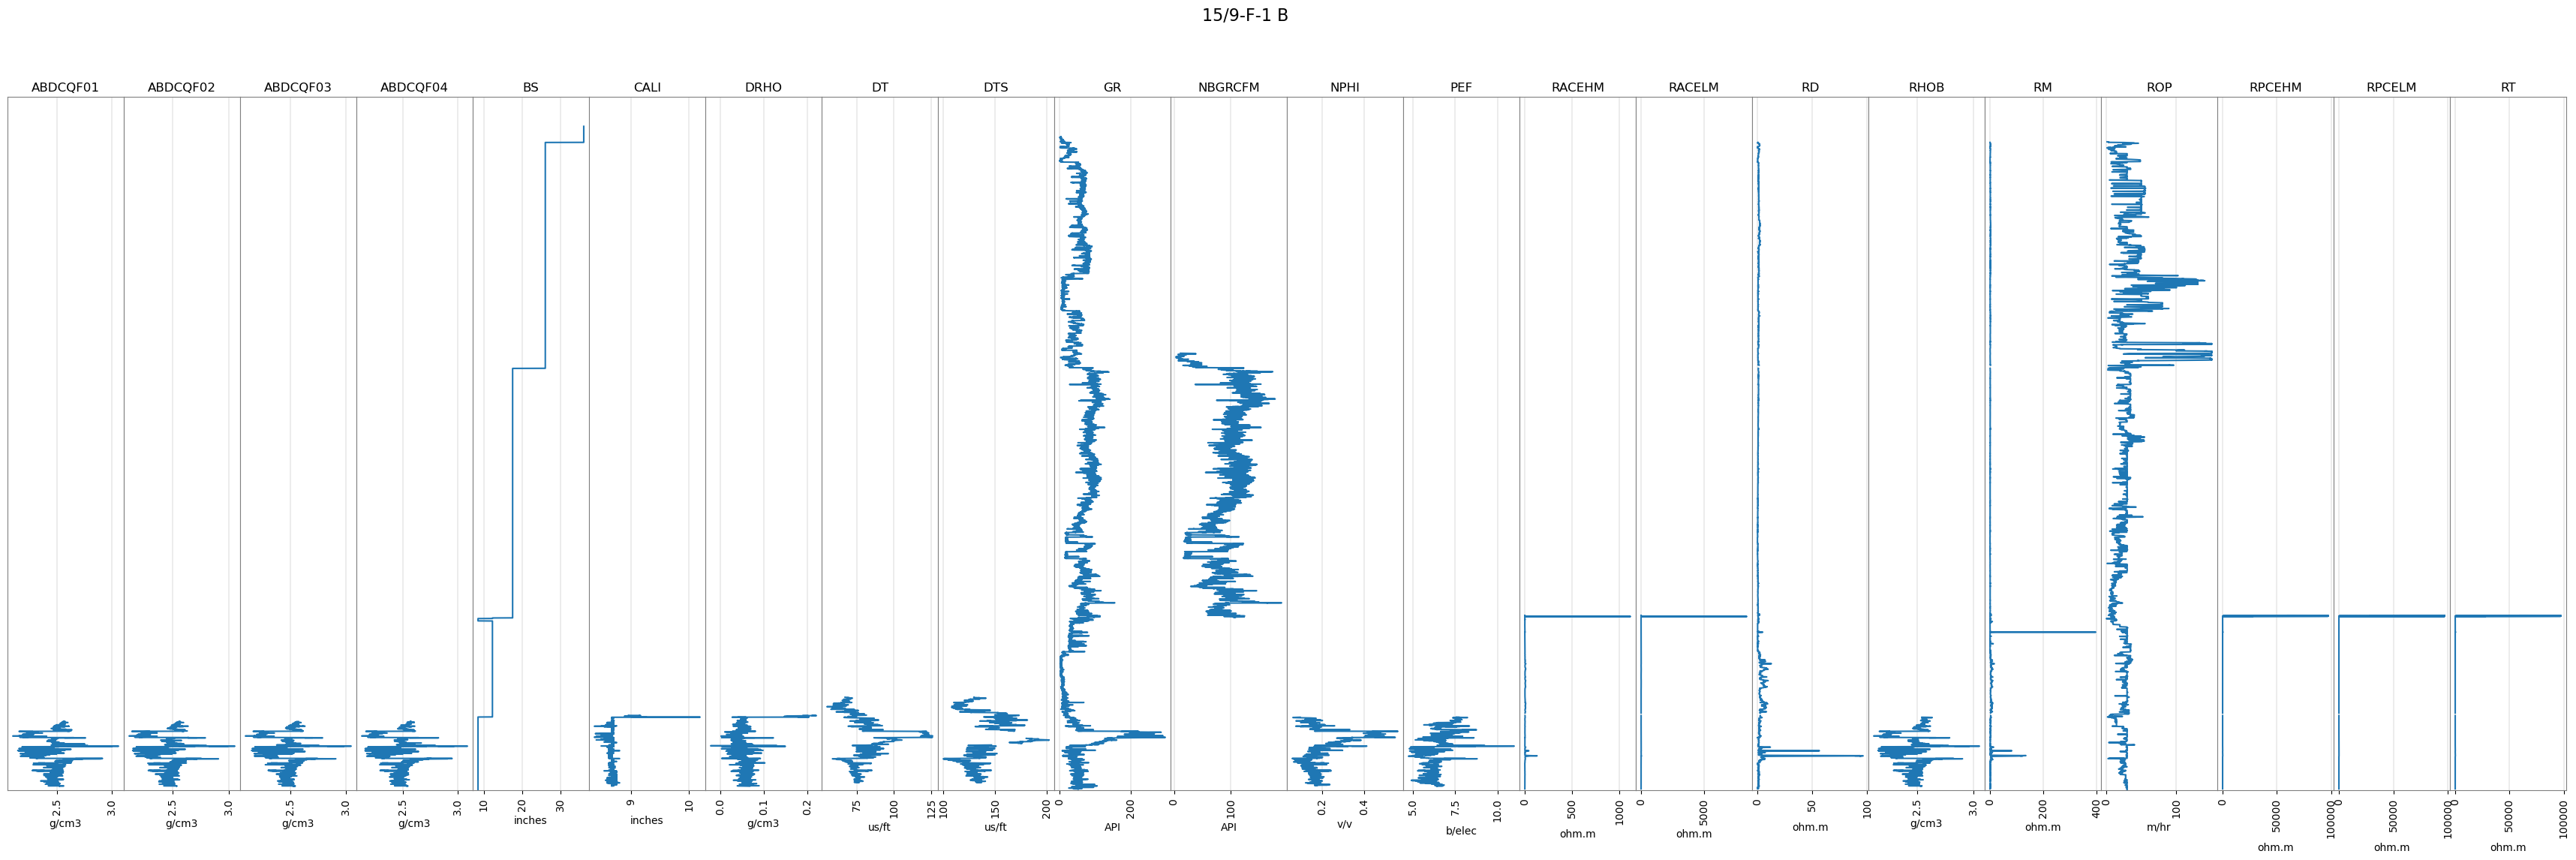

In [14]:
log_input.plot()

### 3.1.1) Calculation of the Volume of clay (Vshale) for the input record

$$V_{shale}=\frac{GR_{max} - GR}{GR_{max} - GR_{min}}$$

**Where:**
- $GR$: Average value taken from the Gamma Ray log (API).
- $GR_{min}$: clays line value from the Gamma Ray log (API)
- $GR_{max}$: sands line value from the Gamma Ray log (API)

In [15]:
df_input

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
145.900000000,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.000000000,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.100000000,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.200000000,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.300000000,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464.499999997,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9836000002,NaN,NaN,NaN
3464.599999997,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9767000002,NaN,NaN,NaN
3464.699999997,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9699000002,NaN,NaN,NaN


In [16]:
df_input['VSH'] = (df_input['GR'].max() - df_input['GR']) / (df_input['GR'].max()\
 - df_input['GR'].min())
df_input.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,VSH
DEPTH,,,,,,,,,,,,,,,,,,,,,
145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then, the calculated V Shale value is added to the .LAS file of the input log, using the *Curve* method of **Welly**.

In [17]:
log_input.data['VSH'] = welly.Curve(df_input['VSH'])

In [18]:
log_input

Well(uwi: '', name: '15/9-F-1 B', 23 curves: ['ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT', 'VSH'])

Now, let us plot the input log again taking into account the **VSH curve** and also reducing the number of curves, to obtain a better visualization.

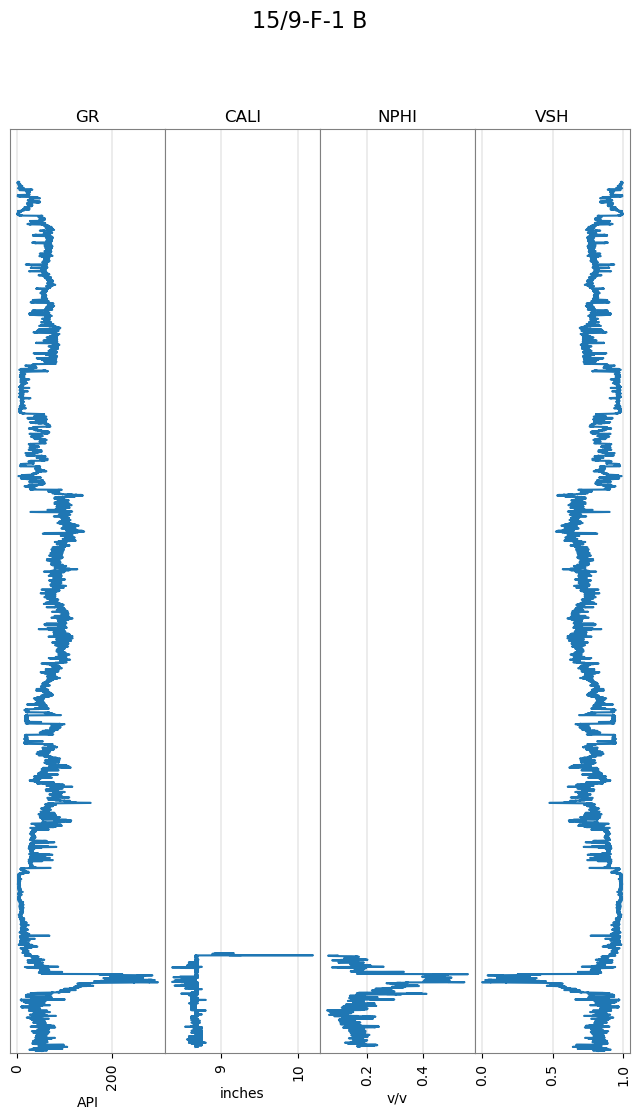

In [19]:
tracks = ['GR', 'CALI', 'NPHI', 'VSH']
log_input.plot(tracks=tracks)

## 3.2) Plot with Welly and Matplotlib

Combining **Welly with Matplotlib**, allows you to create more customized plots, highlighting the following features:

- Set figure dimensions
- Specify curves to be plotted
- Change axis names
- Change the font and size of axis names
- Plot within specific ranges

In [ ]:
tracks = ["KLOGH", "PHIF", "SAND_FLAG", "SW", 'VSH']
log_output.plot(tracks=tracks)

Now, let's customize the graph a bit more, setting the limits to plot for each curve, considering the *to_basis* method of the **welly** library, as well as its start and stop arguments. 

On the other hand, **Matplotlib** takes care of the details of the graph.

In [ ]:
# Curves to plot
curves = ["KLOGH", "PHIF", "SAND_FLAG", "SW", 'VSH']

# State the size of the plot
fig, axes = plt.subplots(1, len(curves), figsize=(20,10))
# Iterate trough the list curves to plot all these curves
for ind, curve in enumerate(curves):
    # Plot within defined intervals
    segment = log_output.data[curve].to_basis(start=3200, stop=3450)
    segment.plot(ax=axes[ind])
    # Set the title of each plot
    axes[ind].set_title(curve)
# Vertical axe
axes[0].set_ylabel('Depth (m)', fontsize=14)
# Set the tile for all these plots     
fig.suptitle('Petrophysical Logs', fontsize=16)
# Prevent graphics from being too close together
fig.tight_layout()

To avoid repeating the same codes, it is preferable to **build functions** in order to extend the scope of the same code to different records, as is done below:

In [ ]:
# Function to plot with Welly and Matplotlib any log curve
def curvas_logs(curvas, log, inicio, final):
    fig, axes = plt.subplots(1, len(curvas), figsize=(20,10))
    for ind, curva in enumerate(curvas):
        segmento = log.data[curva].to_basis(start=inicio, stop=final)
        if curva == 'SAND_FLAG':
            segmento.plot_2d(ax= axes[ind])
        else:
            segmento.plot(ax=axes[ind])
        axes[ind].set_title(curva)
    axes[0].set_ylabel('Depth (m)', fontsize=14)    
    fig.suptitle('Petrophysical Logs', fontsize=16)
    plt.tight_layout()

In [ ]:
# Curves to plot
Curves = ["KLOGH", "PHIF", "SAND_FLAG", "SW", 'VSH']
curvas_logs(Curves, log_output, 3225, 3400)

In [ ]:
df_output

In [ ]:
Curves = ["KLOGH", "PHIF", "SAND_FLAG", "SW", 'VSH', 'BVW']
curvas_logs(Curves, log_output, 3190, 3400)

### 3.3) Plots with Matplotlib

To further customize the graphs, they could be obtained using only **Matplotlib** from a dataframe.

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(5, 10), sharey=True, gridspec_kw={"wspace": 0})
logs_to_plot = ["KLOGH", "PHIF", "SW"]

for ax, log in zip(axs, logs_to_plot):
    ax.plot(df_output[log], df_output.index)
    ax.set_title(log)
    ax.xaxis.tick_top()

axs[0].set_ylim(None, None)
axs[0].invert_yaxis()

#plt.subplots_adjust(wspace=0)
plt.show()

Now, if we want to plot **logs from several wells to observe their correlations**, the following functions can be used:

- The **temp_1** function acts as a template for plotting petrophysical logs with **Matplotlib**, and can also be used to plot multi-well logs.
- The **multi_well** function, which serves to automate the process of plotting multi-well logs.

In [ ]:
def temp_1(fig,
           df_log,
           perm_col,
           phi_col,
           sw_col,
           ref_limits=(None, None)):

    axs = fig.subplots(nrows=1,
                       ncols=3,
                       sharey=True,
                       gridspec_kw={"wspace": 0})

    logs_to_plot = {'green': perm_col, 'blue': phi_col, 'red': sw_col}

    for ax, (color, log) in zip(axs, logs_to_plot.items()):
        ax.plot(df_log[log], df_log.index, color=color)
        ax.set_title(log)
        ax.xaxis.tick_top()

    axs[0].set_ylim(ref_limits[0], ref_limits[1])
    axs[0].invert_yaxis()
    axs[0].set_ylabel("Depth (m)")

First, we import the **petrophysical log** from another well of the Volve field. The log from **well F-1 C** is imported.


In [ ]:
path_file_2 = Path("Data/VOLVE-PETROPHYSICAL_INTERPRETATION/15_9-F-1 C/WLC_PETRO_COMPUTED_OUTPUT_1.LAS")
df_log_2 = lasio.read(path_file_2).df()
df_log_2.head()

Then, **using the temp_1** function, the petrophysical logs of **wells F-1 B and F-1 C** are plotted.

In [ ]:
#from IPython.display import display
fig_all = plt.figure(figsize=(12, 10))
subfigs = fig_all.subfigures(1, 2, wspace=2)

temp_1(subfigs[0], df_output, "KLOGH", "PHIF", "SW", ref_limits=(3200, 3400))
temp_1(subfigs[1], df_log_2, "KLOGH", "PHIF", "SW", ref_limits=(3850, 3900))

plt.show()

On the other hand, if you want to automate the process of **plotting logs from several wells**, you can use the **multi_well** function.

In [ ]:
def multi_well(figsize, data, template):
    fig_all = plt.figure(figsize=figsize)
    subfigs = fig_all.subfigures(1, len(data), wspace=2)
    for idx, (well_name, df) in enumerate(data.items()):
        template(subfigs[idx], df, "KLOGH", "PHIF", "SW")
        subfigs[idx].suptitle(well_name)

To test the **multi_Well** function, we import the LAS file from the petrophysical log of another well, specifically that of **well F-12** and then convert it to dataframe, using the *df* method of the **lasio** library.

In [ ]:
path_file_3 = Path("Data/VOLVE-PETROPHYSICAL_INTERPRETATION/15_9-F-12/WLC_PETRO_COMPUTED_OUTPUT_1.LAS")
df_log_3 = lasio.read(path_file_3).df()
df_log_3.head()

Finally, a **data dictionary** is created, where each analyzed well is assigned its respective petrophysical log dataframe.

In [ ]:
data_logs = {"Pozo F-1 B": df_output,
             "Pozo F-1 C": df_log_2,
             "Pozo F-12": df_log_3,
             }

multi_well((12, 10), data_logs, temp_1)

# Test

Plot the petrophysical logs of the following wells:
- well F-1B
- well F-1 C
- well F-12
- well F-15 D

**Note:** You will first need to import the LAS file of well **F-15 D** and then transform it to dataframe.

In [ ]:
# Write your code here